# Breast Cancer Prediction using Wisconsin Dataset

## Objective 

To develop a predictive model that uses patient diagnostic characteristics to predict if the cancer is malignant or benign. This model will help physicians and healthcare professionals identify the stage of cancer, and the factors contributing to the diagnosis in order to implement more effective prevention strategies.


## Dataset Overview

The dataset is downloaded from kaggle, which was retrieved from UCI machine learning repository. The Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset contains **32 columns** and **569 rows**. 

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none

- Class distribution: 357 benign, 212 malignant

The target column for our project is **Diagnosis**. We have to build a model which can predict if the cancer is **(benign - b)** or **(malignant - m)**.



## Importing Libraries 

The libraries in this project will be imported as required, for the start necessary libraries will be imported. 

- **Pandas** for Data loading and Manipulation.
- **Numpy** for Scientifc and Mathematical functions.
- **Seaborn** and Matplotlib for plotting graphs/charts for Data Visualization. 
- **Warnings** will be imported to ignore the warnings that might arise. 

In [22]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Loading the dataset using pandas

df=pd.read_csv("C:\\Users\\irosh\\Downloads\\data.csv")

In [24]:
df.head() # To Display first 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.info()  # To get data types, no. of features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
#Dropping the Unnamed: 32 column as it has no data.


df = df.drop(columns=['Unnamed: 32'])


In [27]:
df.describe() #Basic statistical summary of all the features

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [28]:
#checking for duplicates
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [29]:
# Encoding 'diagnosis' column
df_clean = df.dropna(subset=['diagnosis'])

df_clean['diagnosis'] = df_clean['diagnosis'].map({'B': 0, 'M': 1})

#Verifying changes
print(df_clean['diagnosis'].unique())


[1 0]


- The **map()** function is used to convert categorical values into numeric values.

    The 'diagnosis' column contains two categories:
- **'B'** for **Benign** tumors.
- **'M'** for **Malignant** tumors.

   The map({'B': 0, 'M': 1}) function is replacing:
- **'B'** (Benign) with **0**.
- **'M'** (Malignant) with **1**.

In [31]:
# Separating features and target
X = df_clean.drop(columns=['id', 'diagnosis'])
y = df_clean['diagnosis']


In [32]:
from sklearn.preprocessing import StandardScaler

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


  **Standardization** ensures that all features contribute equally to the learning process by putting them on the same scale (mean 0, variance 1).

##### Why We Scaled Features in This Project?:

- To ensure all features contribute equally to the model.

- To improve the performance of distance-based algorithms (SVM, k-NN).

- To enable gradient-based algorithms (Logistic Regression, Neural Networks) to converge faster.

- To avoid numerical instability.


In [34]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


 The dataset is split into a **training set (80%)** and a **test set (20%)** using train_test_split.

 The training set is used to train the machine learning model.

 The test set is used to evaluate the model's performance on unseen data, ensuring that the model generalizes well.







### Data Visualization 



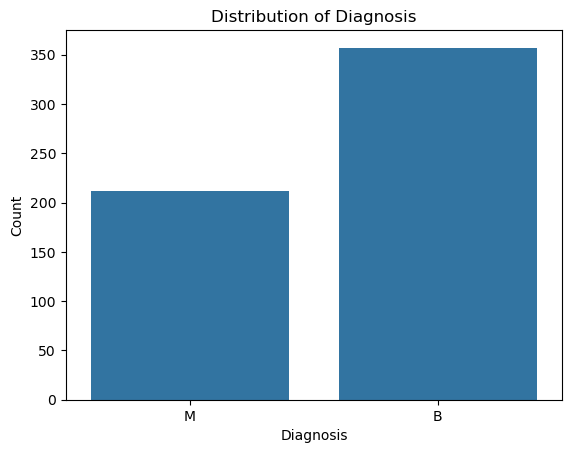

In [37]:
# Plot distribution of the target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

- The box plot shows a higher count of benign (B) cases compared to malignant (M) cases. This indicates an imbalance in the dataset, with benign cases being more prevalent.

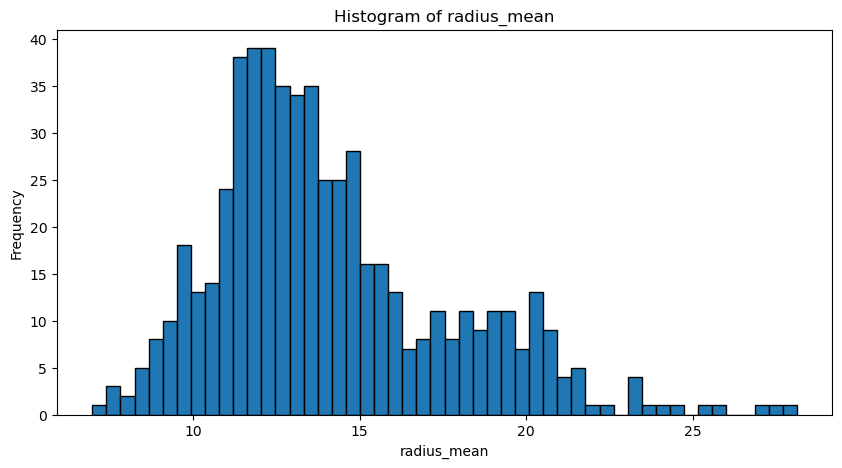

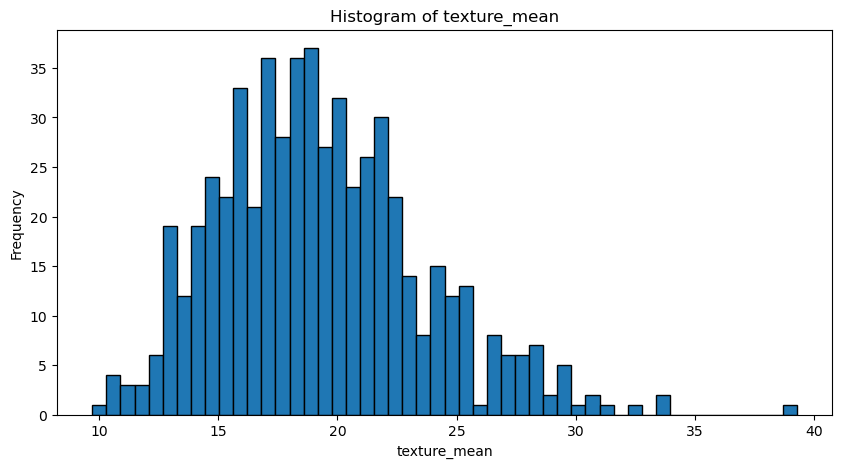

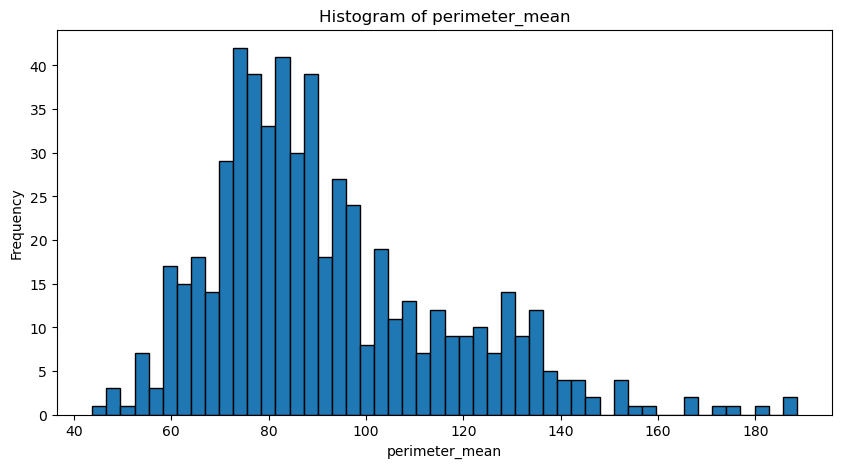

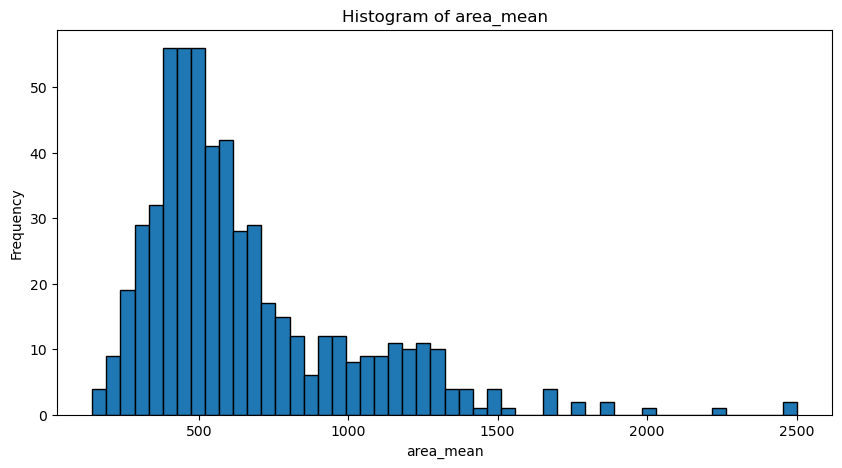

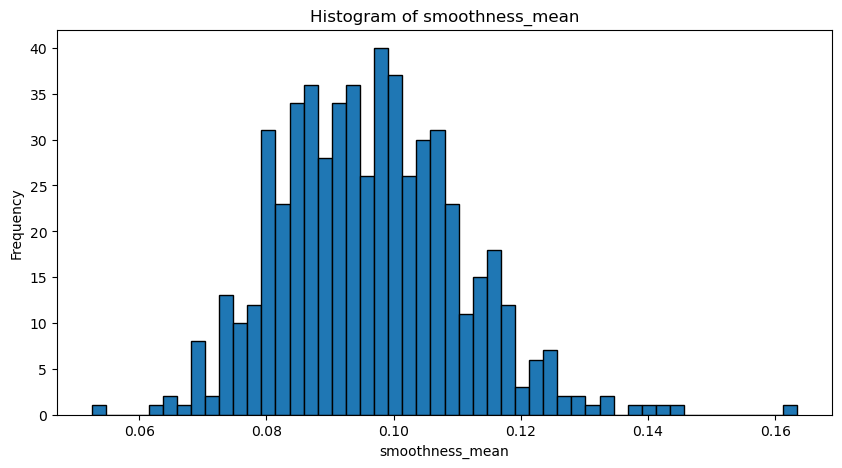

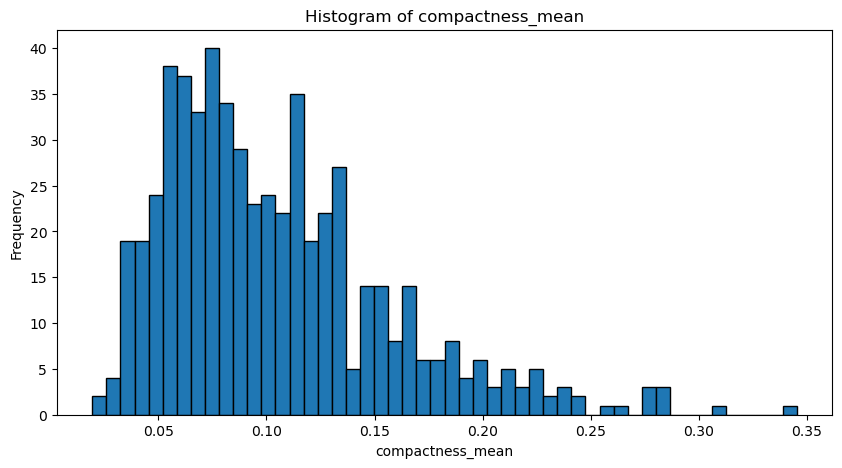

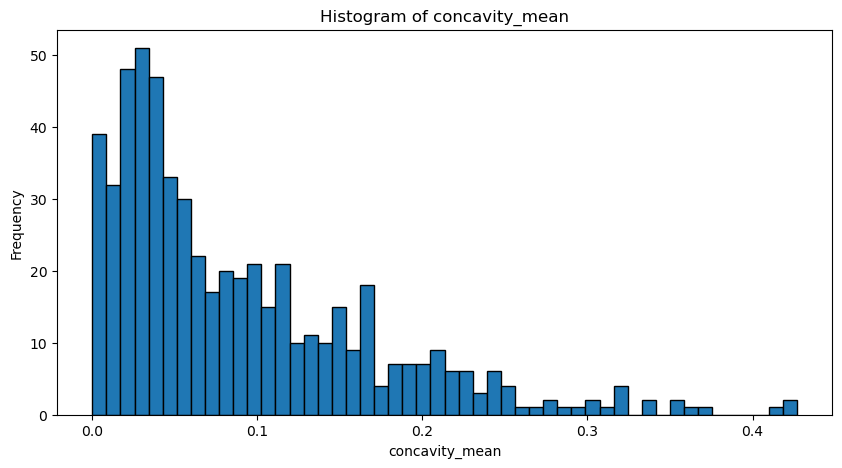

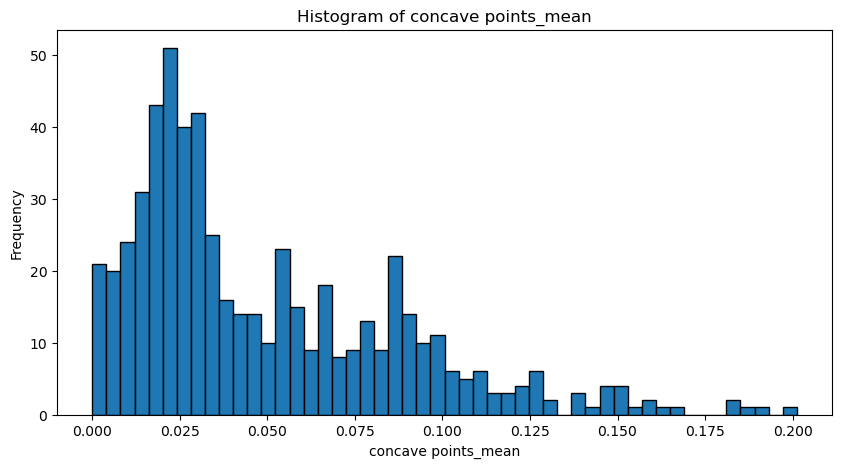

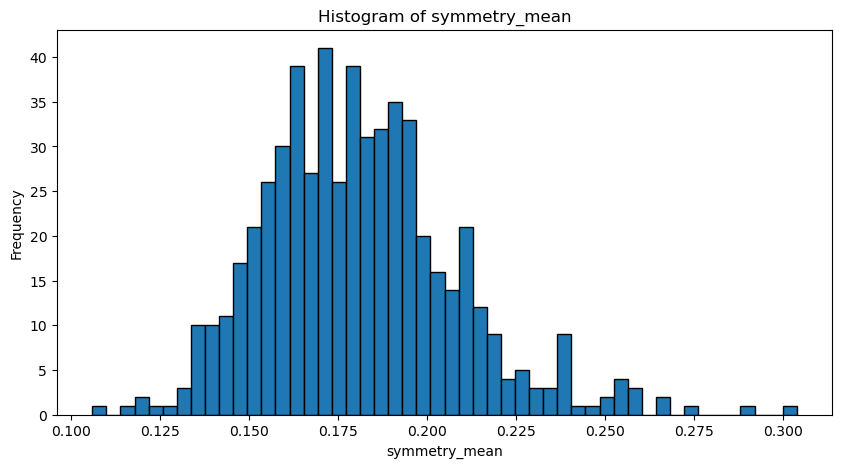

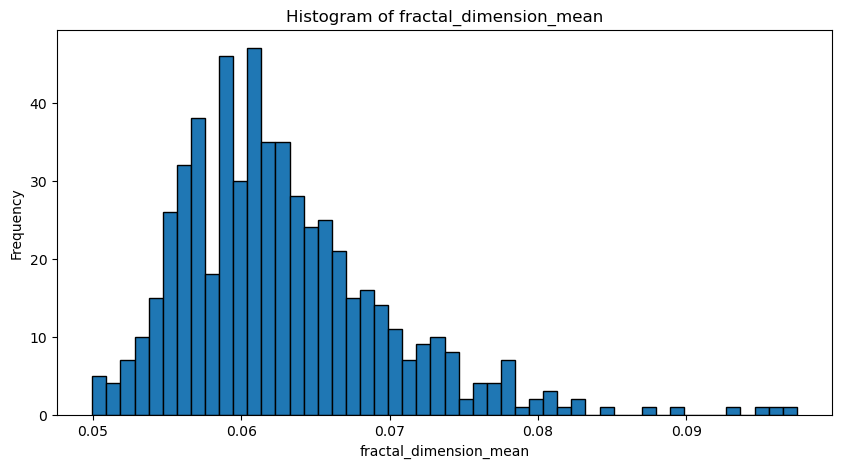

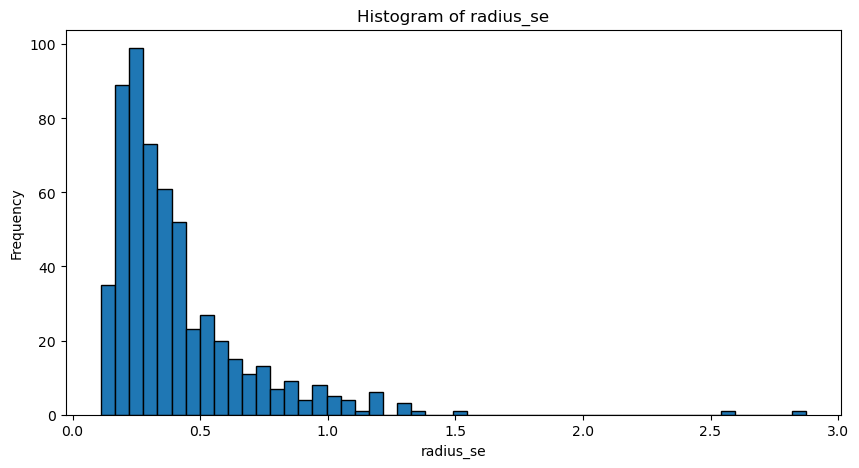

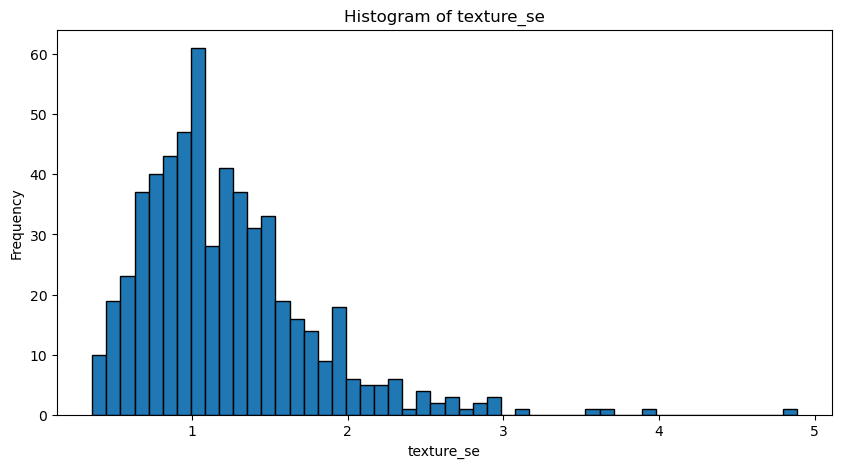

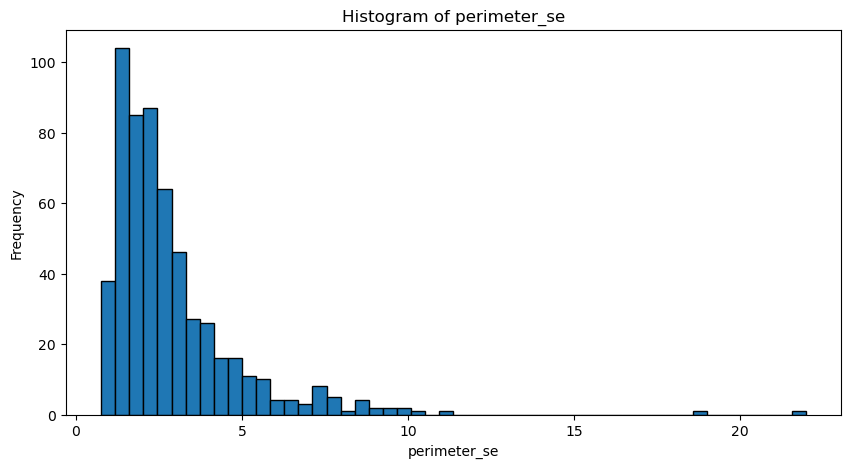

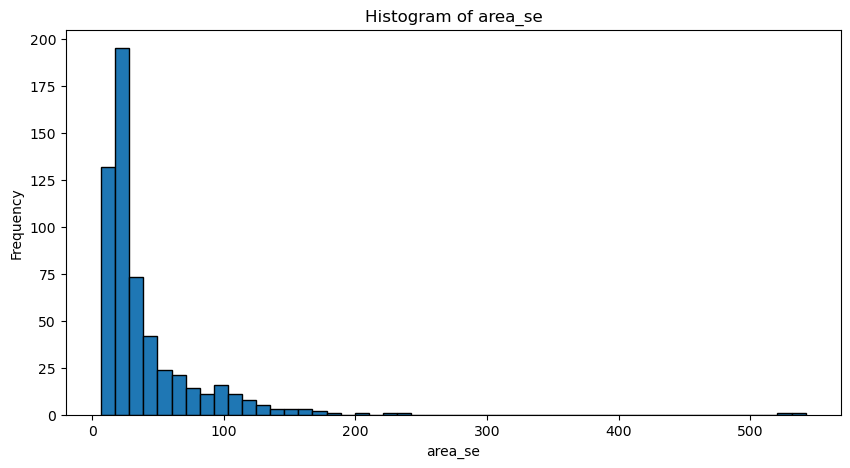

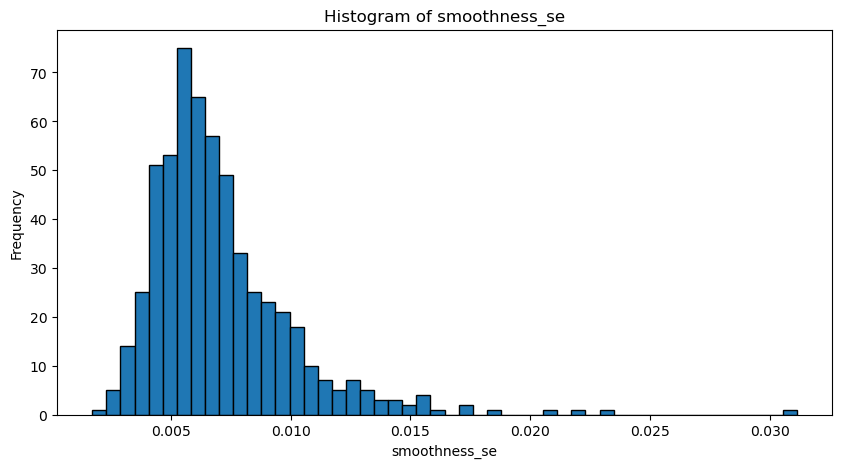

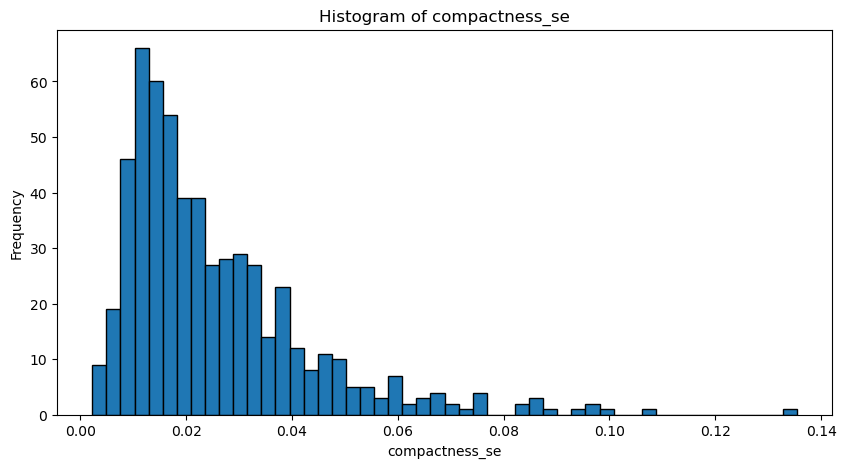

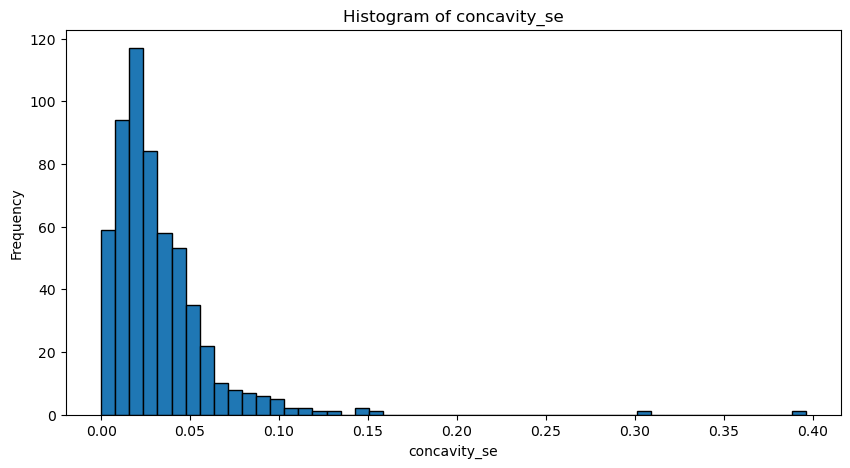

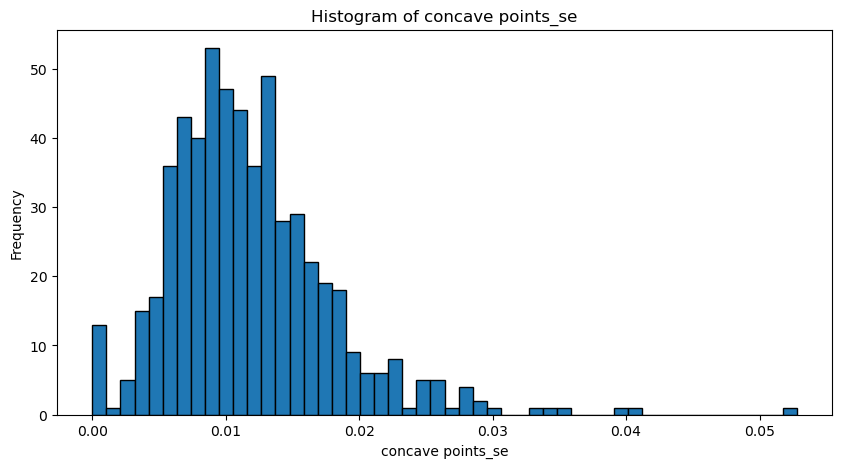

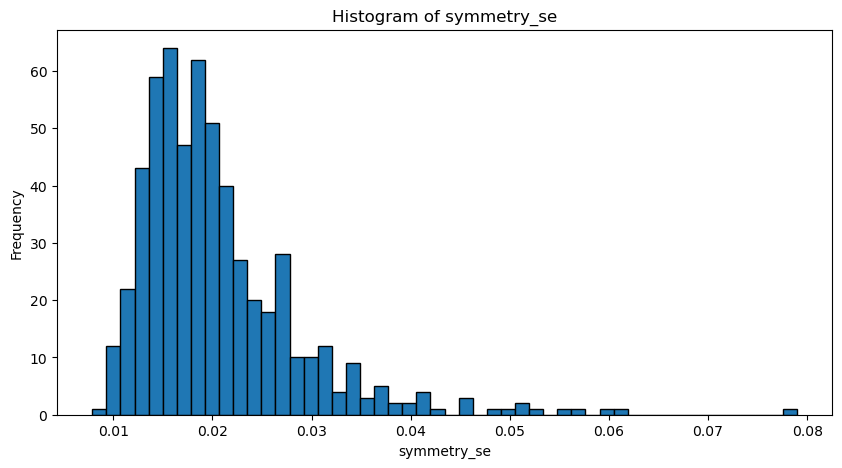

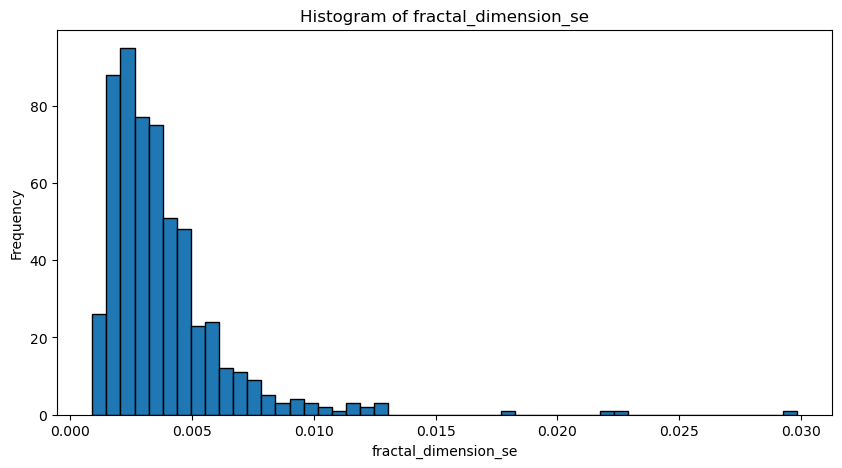

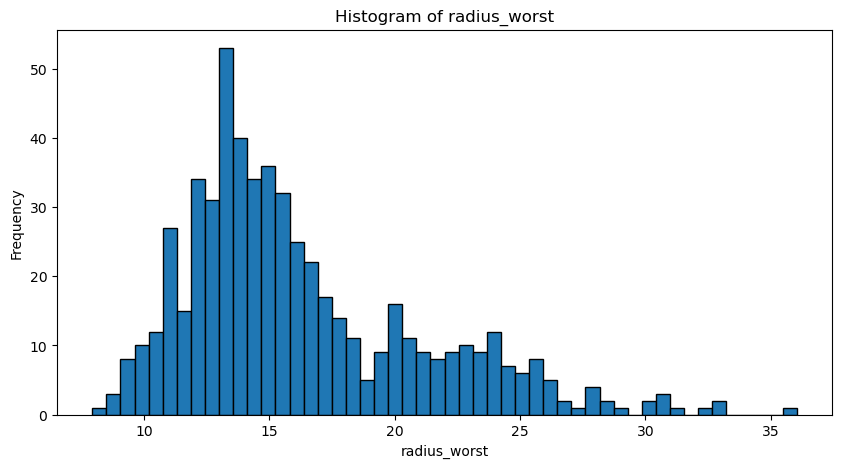

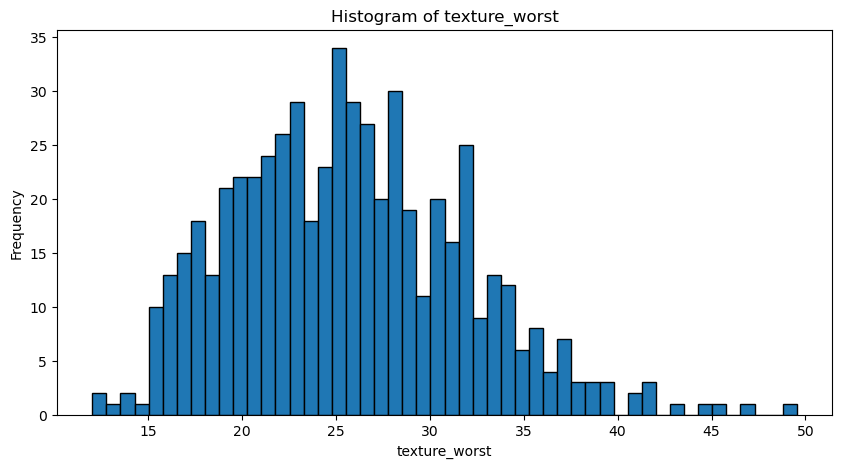

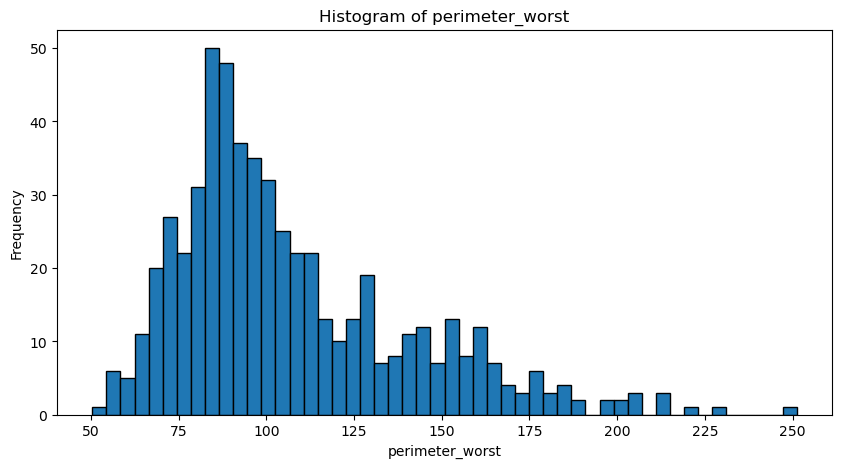

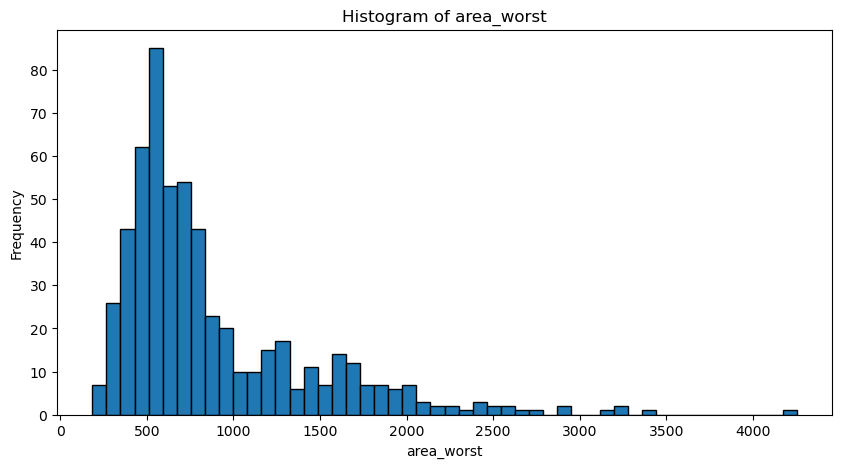

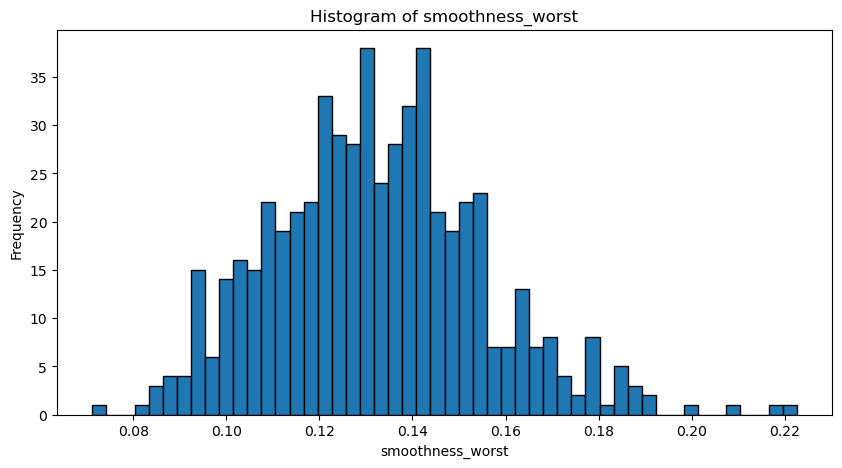

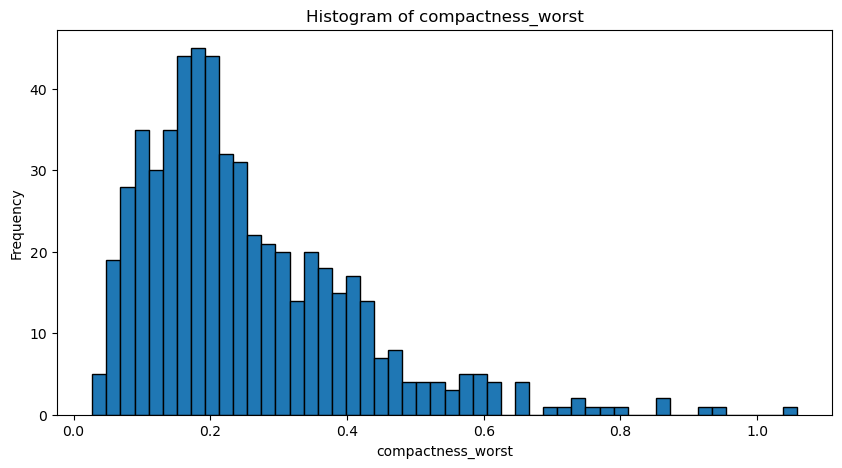

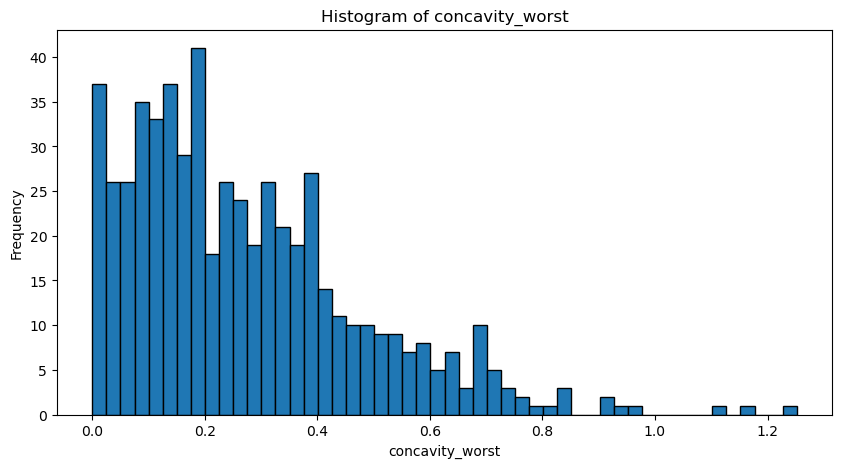

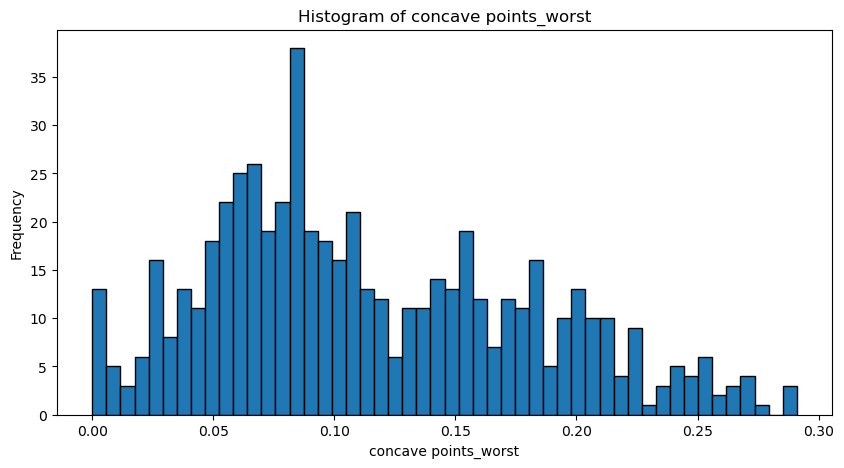

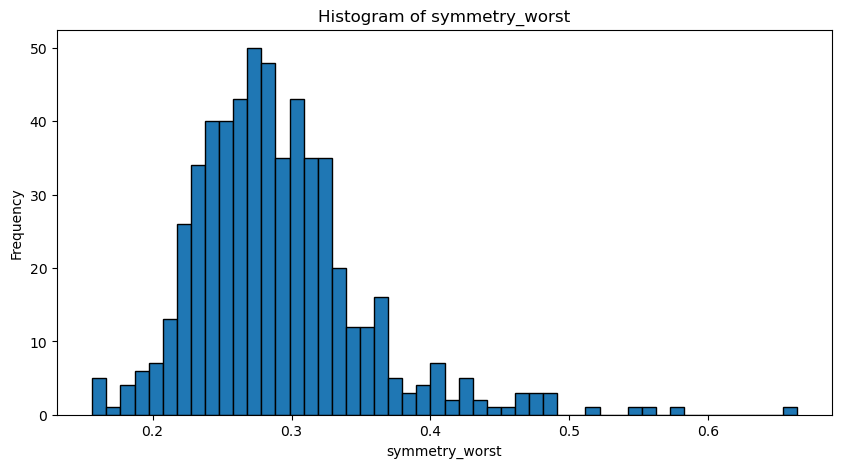

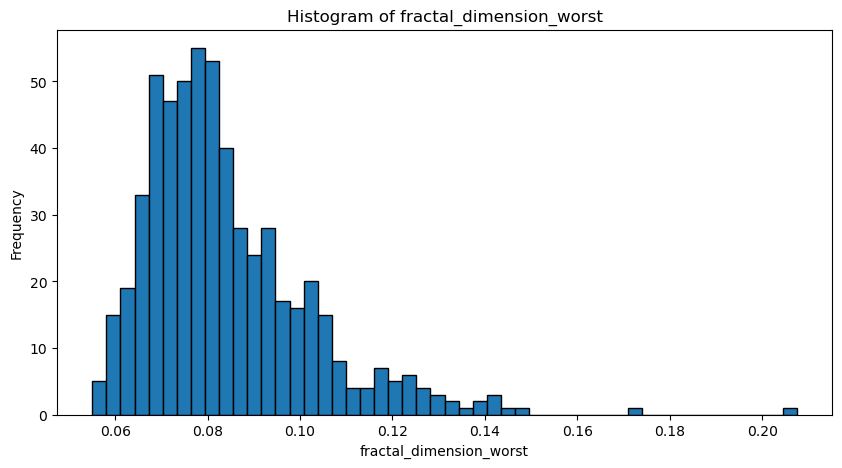

In [39]:
columns=[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for column in columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[column], bins=50,edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

- The histograms reveal that many of the features are skewed, with a small number of tumors showing significantly higher values than the rest.

- Larger tumors (as indicated by features like area_mean, radius_mean, and perimeter_mean) are likely to be associated with malignancy.

- Features like compactness, concavity, and concave points may also be important in distinguishing between benign and malignant tumors due to their wider spread and tendency to cluster at lower values with a few higher outliers.

- The SE(Standard Error) features suggest that tumors with higher variability in measurements may also warrant attention as potential indicators of malignancy.

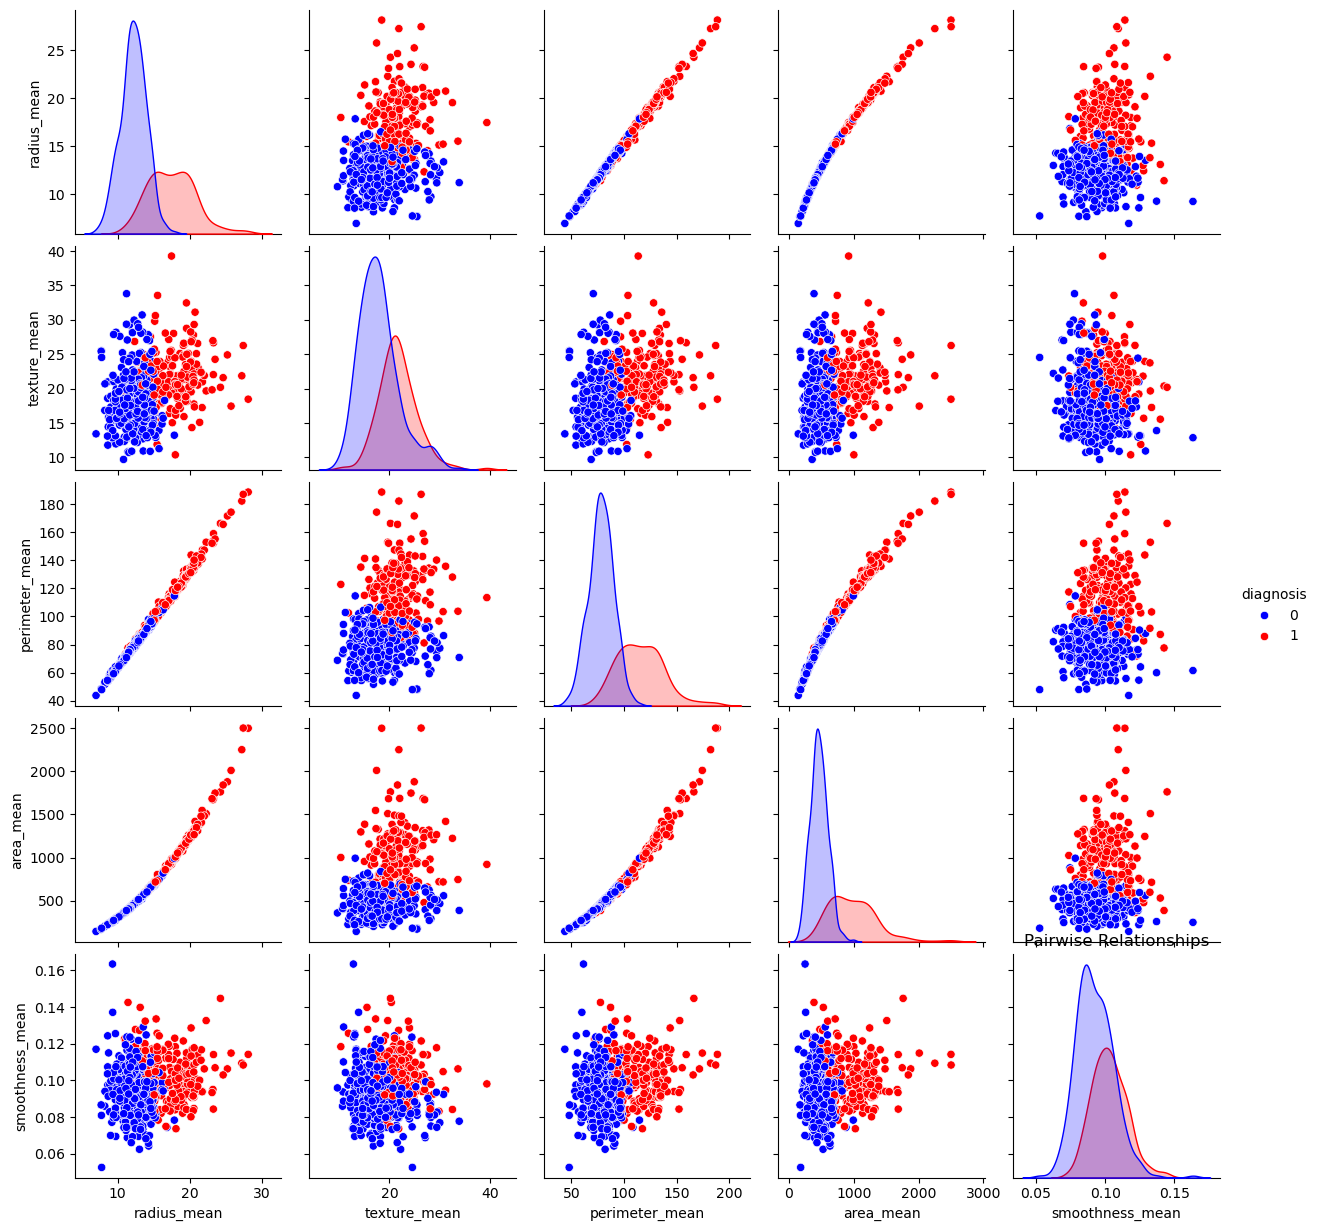

In [96]:
subset = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

sns.pairplot(df_clean, hue='diagnosis', vars=subset, palette={0: 'blue', 1: 'red'})
plt.title('Pairwise Relationships')
plt.show()


- The **'radius_mean'**, **'perimeter_mean'**, and **'area_mean'** are closely related, likely due to their geometric connections.
- **'Smoothness_mean'** appears to be relatively independent from the other features, which may suggest it captures a different aspect of the data.

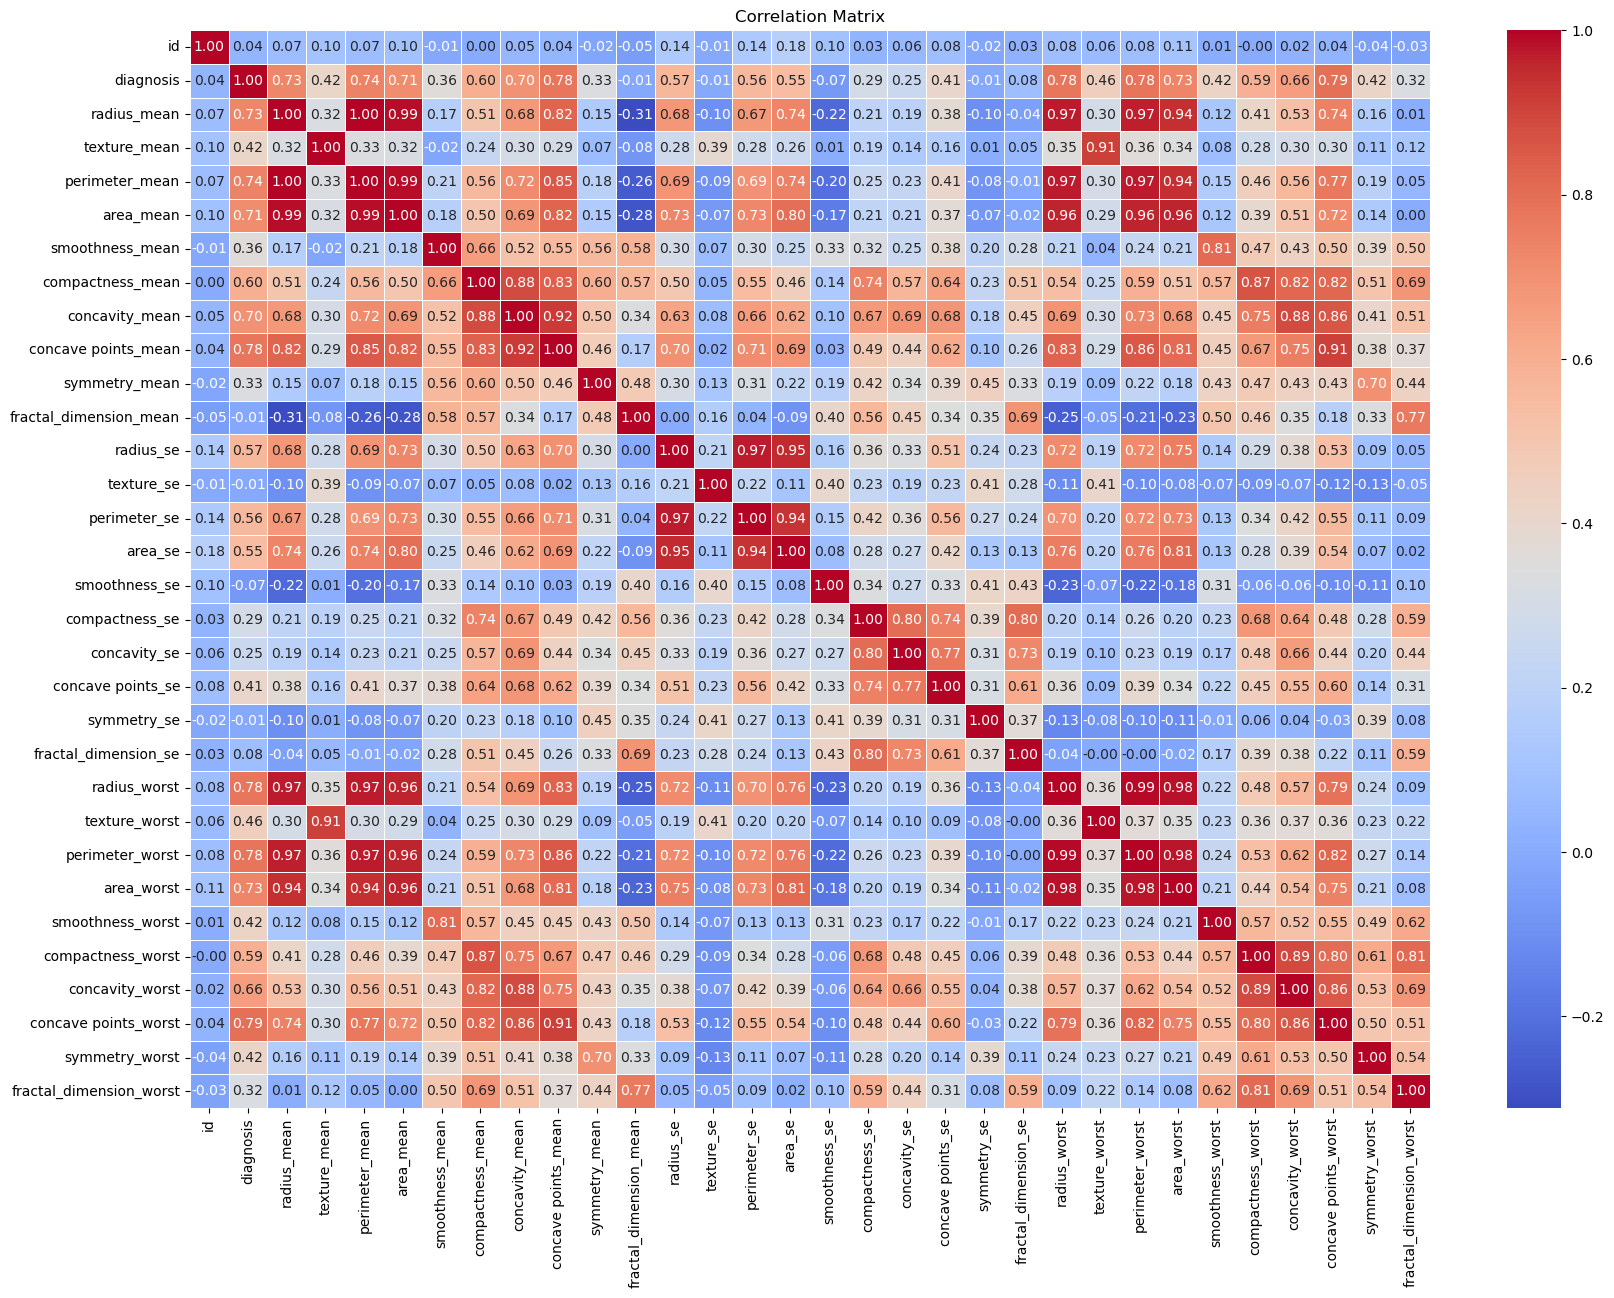

In [140]:
# Computing the correlation matrix
corr_matrix = df_clean.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- **High Correlations:** 'radius_mean' and 'perimeter_mean' have a very high correlation of 0.9979, indicating a strong linear relationship.
- **Moderate Correlations:** 'texture_mean' and 'perimeter_mean' have a moderate correlation of 0.3295.
- **Low Correlations:** Some variables, such as 'smoothness_mean' and 'texture_mean', have low correlations, indicating weak relationships.

There are strong correlations between certain features, such as 'radius_mean' and 'perimeter_mean'. Malignant tumors generally have higher means for most features compared to benign tumors, suggesting that these features could be useful for classification purposes.


## Model Building 

### 1. Random Forest Classifier 

A Random Forest Classifier is an ensemble machine learning algorithm that combines the power of multiple decision trees to make more accurate and robust predictions. It is widely used for both classification and regression tasks. The Random Forest algorithm works by creating a "forest" of decision trees, each trained on random subsets of the data. It then aggregates (averages or takes the majority vote) the predictions from all the trees to make a final decision.

##### Key Concepts of Random Forest

1. **Decision Trees:** 
A decision tree is a model that makes decisions by splitting the dataset into smaller subsets based on feature values. Each node in the tree represents a condition based on a feature, and each branch represents the outcome of that condition.

2. **Ensemble Learning:** 
Ensemble learning refers to the process of combining multiple models to create a more powerful model. The idea behind ensemble methods is that while individual models (like a single decision tree) may have weaknesses, combining multiple models can "average out" errors and improve accuracy.

3. **Bagging (Bootstrap Aggregating):** 
Random Forest uses a technique called bagging to create multiple versions of the training dataset. Each decision tree in the forest is trained on a random sample of the training data, with replacement. This means that some data points may appear multiple times in the same sample, while others may not appear at all. Bagging helps reduce the variance of the model by ensuring that no single tree dominates the decision-making process.

4. **Random Feature Selection:** 
When training each tree, the algorithm selects a random subset of features at each node to find the best split. This introduces more variation between the trees, making the final model more robust and less likely to overfit.

5. **Majority Voting (Classification):** 
In Random Forest classification, each decision tree in the forest makes a prediction (class label) for the input data.The Random Forest aggregates the predictions from all trees and chooses the class that received the majority of the votes as the final prediction. For instance, if 70 trees predict "benign" and 30 predict "malignant," the final prediction would be "benign."

##### In this, the Random Forest algorithm works as follows:

--     Each decision tree in the forest analyzes different aspects of the features (e.g., 'radius_mean', 'texture_mean') of the tumor.

--     Based on the splits in the trees, they predict whether the tumor is benign (0) or malignant (1).

--     The Random Forest aggregates the predictions from all the trees and outputs the most frequent class as the final diagnosis.


##### Advantages of Random Forest:

- **Accuracy:** Random Forest is highly accurate for both classification and regression tasks.

- **Scalability:** It can scale to large datasets and high-dimensional feature spaces.

- **Resistant to Overfitting:** By averaging multiple decision trees, it reduces the likelihood of overfitting compared to a single tree.

- **Feature Importance:** It provides insights into which features are the most important for predictions.


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544


#### Classification Metrics

- **Precision**: The proportion of true positive predictions out of all positive predictions made by the model.
- **Recall**: The proportion of true positive predictions out of all actual positive instances in the dataset.
- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.
- **Support**: The number of actual occurrences of each class in the specified dataset.


 
 
  

The overall accuracy of the model is 96.49%, which means the model correctly predicted whether a tumor was benign or malignant 96.5% of the time on the test data.

--  The model performs very well, with a high precision and recall for both benign and malignant tumors.

--  It slightly favors benign predictions (Class 0) as the recall for Class 1 (malignant) is slightly lower (0.93) than for Class 0 (0.99).

--  The overall accuracy of 96.5% is strong, indicating that the model is reliable for distinguishing between benign and malignant tumors in the test data.

### 2. Gradient Boosting Classifier

The **Gradient Boosting Classifier** is another powerful ensemble machine learning algorithm used for both classification and regression tasks. Unlike Random Forest, which builds multiple decision trees independently and combines their results, Gradient Boosting builds trees sequentially. Each new tree corrects the errors made by the previous trees, gradually improving the model's performance.

##### Key Concepts of Gradient Boosting:

1. **Boosting**:
   - Boosting is an ensemble technique where models are trained sequentially, with each model focusing on correcting the errors of the previous ones.
   - In **Gradient Boosting**, the goal is to minimize the error (loss) by combining weak learners (shallow decision trees) into a strong learner.

2. **Gradient Descent**:
   - The algorithm uses **gradient descent** to optimize the model. After each decision tree is added, the algorithm calculates the gradient of the loss function and updates the model parameters to reduce the error in the next iteration.
   - Gradient Boosting minimizes the difference between the actual and predicted values step by step.

3. **Weak Learners**:
   - Gradient Boosting uses weak learners (typically shallow decision trees) because they are simple models that can easily be improved in each iteration.
   - A weak learner may not perform well individually, but when combined in a boosting framework, the collection of weak learners forms a strong predictive model.

4. **Learning Rate**:
   - A **learning rate** parameter controls how much the model corrects itself during each iteration. A smaller learning rate means slower learning, but it might improve the model’s performance by making smaller, more precise corrections.

5. **Sequential Training**:
   - Each tree is trained to predict the residuals (errors) of the current model’s predictions. The process continues until the specified number of trees (e.g., 100) are built or the model converges.

##### How Gradient Boosting Works (Step-by-Step):

1. **Initialization**:
   - The model starts by making an initial prediction, often just the average of the target values.

2. **Training Weak Learners**:
   - In each iteration, a decision tree is trained on the residual errors (the difference between the actual and predicted values) of the current model.

3. **Updating Predictions**:
   - After each tree is added, the predictions are updated by combining the previous predictions with the new predictions from the current tree, weighted by the learning rate.

4. **Iterative Improvement**:
   - The process continues, with each new tree focusing on the errors of the combined previous trees, gradually improving the model’s accuracy.

5. **Final Model**:
   - After a specified number of trees (100 in this case), the final model is an ensemble of all the weak learners, each making a small contribution to the overall prediction.

##### Gradient Boosting Model Performance:

When applied to the breast cancer dataset:

1. **Model Initialization**:
   - The model is initialized with 100 decision trees (as specified by `n_estimators=100`) and uses a random seed for reproducibility (`random_state=42`).

2. **Training**:
   - The Gradient Boosting model is trained on the scaled training data (`X_train`) and the corresponding target labels (`y_train`).

3. **Predictions**:
   - The model makes predictions on the test data (`X_test`) based on the combined ensemble of weak learners.

4. **Evaluation**:
   - The `classification_report` and `accuracy_score` provide insight into the model's performance, including precision, recall, F1-score, and overall accuracy.



In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialization and training of the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

#  predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.956140350877193


### Gradient Boosting Classification Report


#### Report Overview

 | Class             | Precision | Recall | F1-Score | Support|
 |------------------ |--------   |--------|----------|--------|
 | **0 (Benign)**    | 0.96      | 0.97   | 0.97     | 71     |
 | **1 (Malignant)** | 0.95      | 0.93   | 0.94     | 43     |

- **Overall Accuracy**: 0.96
- **Macro Average**: 
  - Precision: 0.96
  - Recall: 0.95
  - F1-Score: 0.95
- **Weighted Average**: 
  - Precision: 0.96
  - Recall: 0.96
  - F1-Score: 0.96

#### Interpretation of Results

1. **Precision**:
   - For benign cases (Class 0), the precision is **0.96**, indicating that 96% of the instances predicted as benign were actually benign.
   - For malignant cases (Class 1), the precision is **0.95**, meaning that 95% of the instances predicted as malignant were actually malignant.

2. **Recall**:
   - The recall for benign cases is **0.97**, signifying that the model successfully identified 97% of the actual benign cases.
   - The recall for malignant cases is **0.93**, indicating that 93% of the actual malignant cases were correctly predicted.

3. **F1-Score**:
   - The F1-score for benign cases is **0.97**, reflecting a good balance between precision and recall.
   - The F1-score for malignant cases is **0.94**, also indicating a strong performance.

4. **Overall Accuracy**:
   - The model achieved an overall accuracy of **0.96**, meaning it correctly classified 96% of the instances in the test set.

5. **Macro and Weighted Averages**:
   - The macro average provides an overall assessment of model performance without considering class imbalance, while the weighted average accounts for the number of instances per class, demonstrating consistent performance across both metrics.




   ### 3. XGBoost Classifier

**XGBoost** (Extreme Gradient Boosting) is an advanced implementation of gradient boosting designed to provide higher performance and greater efficiency. It has become one of the most popular algorithms for structured data because of its speed and predictive accuracy. 

#### Key Features of XGBoost:

1. **Regularization**:
   - XGBoost incorporates L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting, making it robust against noisy data.

2. **Handling Missing Values**:
   - The algorithm can automatically handle missing values during the training phase, which reduces the need for extensive data preprocessing.

3. **Parallel Processing**:
   - Unlike traditional gradient boosting, which processes trees sequentially, XGBoost can train multiple trees simultaneously, leading to faster computation.

4. **Tree Pruning**:
   - XGBoost uses a more efficient tree pruning strategy called "max_depth", which allows for more control over the model complexity.

5. **Scalability**:
   - It is designed to scale effectively with large datasets, making it suitable for a variety of real-world applications.

#### Model Training and Evaluation

1. **Model Initialization**:
   - The `XGBClassifier` is initialized with 100 estimators (decision trees) and a random seed (`random_state=42`) for reproducibility. The parameter `use_label_encoder=False` avoids a warning related to label encoding in newer versions.

2. **Training the Model**:
   - The model is trained using the scaled training data (`X_train`) and the corresponding target labels (`y_train`).

3. **Predictions**:
   - After training, the model makes predictions on the test data (`X_test`), producing predicted labels for each instance.

4. **Model Evaluation**:
   - The model's performance is evaluated using the `classification_report` and `accuracy_score` functions from scikit-learn. The classification report provides detailed metrics, including precision, recall, F1-score, and support for each class.


In [71]:
import xgboost as xgb

# Initialization and training of XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluations
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.956140350877193


### XGBoost Classification Report

#### Report Overview

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|--------|
| **0 (Benign)** | 0.96      | 0.97   | 0.97     | 71     |
| **1 (Malignant)** | 0.95      | 0.93   | 0.94     | 43     |

- **Overall Accuracy**: 0.96
- **Macro Average**: 
  - Precision: 0.96
  - Recall: 0.95
  - F1-Score: 0.95
- **Weighted Average**: 
  - Precision: 0.96
  - Recall: 0.96
  - F1-Score: 0.96

#### Interpretation of Results

1. **Precision**:
   - For benign cases (Class 0), the precision is **0.96**, indicating that 96% of the instances predicted as benign were actually benign.
   - For malignant cases (Class 1), the precision is **0.95**, meaning that 95% of the instances predicted as malignant were actually malignant.

2. **Recall**:
   - The recall for benign cases is **0.97**, signifying that the model successfully identified 97% of the actual benign cases.
   - The recall for malignant cases is **0.93**, indicating that 93% of the actual malignant cases were correctly predicted.

3. **F1-Score**:
   - The F1-score for benign cases is **0.97**, reflecting a good balance between precision and recall.
   - The F1-score for malignant cases is **0.94**, also indicating a strong performance.

4. **Overall Accuracy**:
   - The model achieved an overall accuracy of **0.96**, meaning it correctly classified 96% of the instances in the test set.

5. **Macro and Weighted Averages**:
   - The macro average provides an overall assessment of model performance without considering class imbalance, while the weighted average accounts for the number of instances per class, demonstrating consistent performance across both metrics.



### 4. MLPClassifier (Multi-layer Perceptron Classifier)

**MLPClassifier** is a type of neural network model that implements a feedforward artificial neural network. It consists of multiple layers of interconnected nodes (neurons), allowing it to learn complex patterns in the data. 

#### Key Features of MLPClassifier:

1. **Architecture**:
   - The model consists of an input layer, one or more hidden layers, and an output layer. Each layer contains a certain number of neurons, and the connections between them have associated weights.

2. **Activation Function**:
   - MLP uses activation functions (like ReLU, sigmoid, or tanh) to introduce non-linearity into the model, enabling it to learn complex relationships.

3. **Training Process**:
   - The MLP is trained using backpropagation, a supervised learning algorithm that adjusts the weights based on the error of the predictions. The training process involves the following steps:
     - **Forward Pass**: Input data is passed through the network to generate predictions.
     - **Loss Calculation**: The difference between the predicted and actual values is calculated using a loss function.
     - **Backward Pass**: The weights are updated to minimize the loss, propagating the error back through the network.

4. **Hyperparameters**:
   - **hidden_layer_sizes**: Defines the number of neurons in each hidden layer. For example, `(100, 50)` means the model has two hidden layers with 100 and 50 neurons, respectively.
   - **max_iter**: The maximum number of iterations (epochs) for the training process. More iterations can lead to better convergence but may also increase the risk of overfitting.
   - **random_state**: Ensures reproducibility by setting a seed for random number generation.

#### Model Training and Evaluation

1. **Model Initialization**:
   - The `MLPClassifier` is initialized with specified hyperparameters, including the structure of the hidden layers, maximum iterations, and a random seed for reproducibility.

2. **Training the Model**:
   - The model is trained on the scaled training dataset (`X_train`) and the corresponding target labels (`y_train`). During this phase, the MLP learns to associate the features with the labels by adjusting its internal weights.

3. **Making Predictions**:
   - Once trained, the model predicts the labels for the test dataset (`X_test`). These predictions are stored for evaluation.

4. **Model Evaluation**:
   - The model's performance is assessed using the `classification_report` and `accuracy_score` functions from scikit-learn. The classification report provides detailed metrics, including precision, recall, F1-score, and support for each class, while the accuracy score indicates the overall proportion of correctly classified instances.


In [74]:
from sklearn.neural_network import MLPClassifier

# Initialization and training the MLPClassifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation
print("MLPClassifier Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Accuracy Score:", accuracy_score(y_test, y_pred_mlp))


MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score: 0.9736842105263158


### MLPClassifier Classification Report



#### Report Overview

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|--------|
| **0 (Benign)** | 0.97      | 0.99   | 0.98     | 71     |
| **1 (Malignant)** | 0.98      | 0.95   | 0.96     | 43     |

- **Overall Accuracy**: 0.97
- **Macro Average**: 
  - Precision: 0.97
  - Recall: 0.97
  - F1-Score: 0.97
- **Weighted Average**: 
  - Precision: 0.97
  - Recall: 0.97
  - F1-Score: 0.97

#### Interpretation of Results

1. **Precision**:
   - For benign cases (Class 0), the precision is **0.97**, indicating that 97% of the instances predicted as benign were actually benign.
   - For malignant cases (Class 1), the precision is **0.98**, meaning that 98% of the instances predicted as malignant were actually malignant.

2. **Recall**:
   - The recall for benign cases is **0.99**, signifying that the model successfully identified 99% of the actual benign cases.
   - The recall for malignant cases is **0.95**, indicating that 95% of the actual malignant cases were correctly predicted.

3. **F1-Score**:
   - The F1-score for benign cases is **0.98**, reflecting a good balance between precision and recall.
   - The F1-score for malignant cases is **0.96**, also indicating strong performance.

4. **Overall Accuracy**:
   - The model achieved an overall accuracy of **0.97**, meaning it correctly classified 97% of the instances in the test set.

5. **Macro and Weighted Averages**:
   - The macro average provides an overall assessment of model performance without considering class imbalance, while the weighted average accounts for the number of instances per class, demonstrating consistent performance across both metrics.



### 5. TPOT Classifier

The **TPOT** (Tree-Based Pipeline Optimization Tool) Classifier is an automated machine learning (AutoML) tool designed to streamline the process of creating machine learning models. It employs genetic programming to optimize machine learning pipelines, making it particularly beneficial for users who may not have extensive expertise in machine learning.

#### How TPOT Works with the Dataset

1. **Automated Pipeline Generation**: 
   - TPOT analyzes the input dataset and automatically generates various machine learning pipelines. This includes selecting different models (e.g., decision trees, support vector machines) and preprocessing steps (e.g., scaling, feature selection).
  
2. **Genetic Programming**:
   - TPOT utilizes genetic programming principles to evolve pipelines over multiple generations. Each pipeline represents a unique combination of preprocessing methods and machine learning algorithms. TPOT evaluates the performance of these pipelines based on their accuracy on the training data.

3. **Optimization Process**:
   - The tool starts with an initial population of randomly generated pipelines. It then iteratively refines this population by selecting the best-performing pipelines and combining them (crossover) while also introducing random mutations. This evolutionary process continues for a specified number of generations, allowing TPOT to converge on the most effective model for the dataset.

4. **Hyperparameter Tuning**:
   - Alongside selecting the best algorithms, TPOT also tunes the hyperparameters of these models, further enhancing their performance. This ensures that the chosen pipeline is not only effective in terms of model selection but also optimized for the best parameter settings.

5. **Output**:
   - After the optimization process is complete, TPOT provides the best pipeline, which can then be directly applied to make predictions on new data. This pipeline will consist of the best-suited model and any necessary preprocessing steps.

#### Key Concepts of TPOT

- **AutoML**: TPOT is part of the broader AutoML movement, which aims to automate the process of applying machine learning to real-world problems. By minimizing the manual effort required for model selection and tuning, AutoML tools like TPOT allow users to focus on interpreting results and making data-driven decisions.

- **Genetic Algorithms**: The core of TPOT's optimization strategy is based on genetic algorithms, which simulate the process of natural selection. Pipelines that perform well are retained and combined, while less effective ones are discarded, mimicking the evolutionary process.

- **Scalability**: TPOT is designed to handle a variety of datasets, ranging from small to large. It can effectively identify suitable models and preprocessing techniques, regardless of the complexity of the dataset.

- **User-Friendly Interface**: While TPOT automates complex processes, it also provides a straightforward interface for users. This allows even those with limited machine learning experience to leverage the power of automated model generation and optimization.

By employing TPOT on the dataset, users can efficiently explore various machine learning models and preprocessing techniques, leading to the discovery of high-performing pipelines. The automation of model selection and hyperparameter tuning simplifies the machine learning workflow, enabling users to derive insights and predictions from their data more effectively.


In [78]:
from tpot import TPOTClassifier

# Initialization and training of TPOT model
tpot_model = TPOTClassifier( generations=5, population_size=20, random_state=42 )
tpot_model.fit(X_train, y_train)

# predictions
y_pred_tpot = tpot_model.predict(X_test)

# Evaluation
print("TPOT Classification Report:\n", classification_report(y_test, y_pred_tpot))
print("Accuracy Score:", accuracy_score(y_test, y_pred_tpot))


TPOT Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.9649122807017544


### TPOT Classification Report Interpretation


#### Precision, Recall, F1-Score, and Support:

- **Class 0 (Benign)**
  - **Precision**: 0.97
    - Indicates that 97% of the instances predicted as benign (0) were correctly classified.
  - **Recall**: 0.97
    - Reflects that 97% of the actual benign instances were correctly identified by the model.
  - **F1-Score**: 0.97
    - This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for class 0.
  - **Support**: 71
    - Represents the number of actual instances of class 0 in the test set.

- **Class 1 (Malignant)**
  - **Precision**: 0.95
    - Indicates that 95% of the instances predicted as malignant (1) were accurately classified.
  - **Recall**: 0.95
    - Shows that 95% of the actual malignant instances were correctly identified.
  - **F1-Score**: 0.95
    - The F1-score for this class is slightly lower than that for class 0, indicating a minor trade-off between precision and recall for malignant instances.
  - **Support**: 43
    - Represents the number of actual instances of class 1 in the test set.

#### Overall Performance:
- **Accuracy**: 0.96
  - This means that the model correctly classified 96% of the total instances in the test dataset.
  
- **Macro Average**:
  - **Precision**: 0.96
  - **Recall**: 0.96
  - **F1-Score**: 0.96
  - The macro average provides an unweighted average of precision, recall, and F1-score across both classes, indicating that the model performs consistently across classes.

- **Weighted Average**:
  - **Precision**: 0.96
  - **Recall**: 0.96
  - **F1-Score**: 0.96
  - The weighted average takes into account the support of each class, giving a better indication of overall model performance when dealing with imbalanced classes.



### 6. Deep Neural Network (DNN) Model

In this project, we utilized a Deep Neural Network (DNN) for binary classification of breast cancer tumors based on various features derived from the dataset. Below is a detailed explanation of the model's architecture, training, and evaluation.

#### Model Architecture

1. **Sequential Model**:
   - The model is built using the Sequential API from TensorFlow's Keras library, which allows us to stack layers linearly to form a neural network.

2. **Input Layer**:
   - The first layer of the DNN is a Dense layer with 64 neurons and the ReLU (Rectified Linear Unit) activation function. It takes input in the shape of the number of features in the training dataset (`X_train.shape[1]`).

3. **Hidden Layer**:
   - The second Dense layer consists of 32 neurons, also using the ReLU activation function. This layer helps the model learn more complex patterns in the data.

4. **Output Layer**:
   - The final layer is a Dense layer with a single neuron, using the sigmoid activation function. This configuration is suitable for binary classification tasks, as it outputs a probability value between 0 and 1.

#### Model Compilation

- The model is compiled using the following parameters:
  - **Optimizer**: Adam, which is an efficient stochastic optimization algorithm that adjusts the learning rate based on the average of recent gradient magnitudes.
  - **Loss Function**: Binary Crossentropy, which is commonly used for binary classification problems.
  - **Metrics**: Accuracy, which measures the proportion of correctly predicted instances.

#### Model Training

- The model is trained on the training dataset (`X_train` and `y_train`) for 50 epochs with a batch size of 32. 
- A validation split of 20% is used during training to monitor the model's performance on unseen data, helping to prevent overfitting.

#### Model Predictions

- After training, predictions are made on the test dataset (`X_test`). 
- The predicted probabilities are converted to binary class labels (0 or 1) by thresholding at 0.5. This means that if the predicted probability is greater than 0.5, the prediction is class 1 (malignant); otherwise, it is class 0 (benign).




In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialization of DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compiling model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training  model
dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Making predictions
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")

# Evaluating the model
print("DNN Classification Report:\n", classification_report(y_test, y_pred_dnn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dnn))


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.4654 - loss: 0.6904 - val_accuracy: 0.8242 - val_loss: 0.5242
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9141 - loss: 0.4718 - val_accuracy: 0.9231 - val_loss: 0.3699
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9286 - loss: 0.3333 - val_accuracy: 0.9231 - val_loss: 0.2532
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9666 - loss: 0.2052 - val_accuracy: 0.9341 - val_loss: 0.1826
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9670 - loss: 0.1609 - val_accuracy: 0.9560 - val_loss: 0.1492
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9595 - loss: 0.1274 - val_accuracy: 0.9560 - val_loss: 0.1317
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9818 - loss: 0.0802 - val_accuracy: 0.9560 - val_loss: 0.1227
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9856 - loss: 0.0683 - val_accuracy: 0.9560 - v

### DNN Classification Report

The classification report for the Deep Neural Network (DNN) model is as follows:

| Metric          | Class 0 (Benign) | Class 1 (Malignant) | Average |
|-----------------|------------------|----------------------|---------|
| **Precision**    | 0.96             | 0.98                 | 0.97    |
| **Recall**       | 0.99             | 0.93                 | 0.96    |
| **F1-Score**     | 0.97             | 0.95                 | 0.96    |
| **Support**      | 71               | 43                   | 114     |

#### Interpretation:

- **Precision**:
  - For Class 0 (Benign): The model achieved a precision of 0.96, indicating that 96% of the instances classified as benign are indeed benign.
  - For Class 1 (Malignant): The precision is 0.98, meaning that 98% of the instances classified as malignant are actually malignant. High precision for both classes suggests that the model is effective at minimizing false positives.

- **Recall**:
  - For Class 0 (Benign): The recall is 0.99, indicating that 99% of actual benign instances were correctly identified by the model. This reflects a strong capability to detect benign tumors.
  - For Class 1 (Malignant): The recall is 0.93, meaning that 93% of actual malignant instances were correctly identified. While this is also high, it suggests there is a slight chance of missing malignant tumors, which is critical in medical diagnoses.

- **F1-Score**:
  - The F1-score is the harmonic mean of precision and recall. For Class 0, it is 0.97, and for Class 1, it is 0.95. These scores highlight a good balance between precision and recall for both classes, indicating the model's robustness.

- **Support**:
  - Support refers to the number of actual occurrences of each class in the test set. In this case, there are 71 benign instances and 43 malignant instances.

#### Overall Accuracy:

- **Accuracy Score**: The overall accuracy of the model is approximately **96.49%**. This score reflects that the model correctly classified about 96.49% of the total test samples (114 instances). This high accuracy rate indicates that the DNN model is effective in distinguishing between benign and malignant tumors based on the provided features.



### Key Insights:

- **MLP Classifier (Neural Network)** slightly outperforms the other models with the **highest accuracy (97.37%)**. It also shows excellent **precision, recall, and F1-scores**, especially for the malignant class, which is crucial for medical diagnosis.

- **Random Forest, TPOT, and DNN** models also perform well with similar accuracy scores around **96.49%**, but they fall just behind the MLP in terms of overall performance.

- **Gradient Boosting and XGBoost** models have slightly lower accuracy, and their recall for the malignant class (93%) suggests that they may miss a higher number of malignant cases compared to the other models.

---

### Final Recommendation:

- The **MLP Classifier (Neural Network)** is the most suitable model for this project because it achieves the **highest accuracy** and balances **precision, recall, and F1-scores** effectively.
  
- Its ability to detect malignant tumors (high recall) is essential in this medical context, where false negatives (misclassifying a malignant tumor as benign) can have serious consequences.


### Hyperparameter Tuning 

Hyperparameter tuning helps to optimize a model's performance by selecting the best configuration of settings that govern the learning process. For the MLP Classifier in this project, tuning ensures the model can classify breast cancer data accurately by adjusting parameters like hidden layers, activation functions, learning rates, and batch sizes.

**Key Points:** 

- **Hidden Layers and Neurons**: Control model complexity and pattern recognition.
- **Activation Function**: Enables the model to capture non-linear relationships (e.g., ReLU, tanh).
- **Solver**: Optimizes weights (`Adam`, `SGD`).
- **Learning Rate**: Balances convergence speed and precision.
- **Batch Size**: Affects training stability and speed.
- **Max Iterations**: Controls the number of training loops over data.

**GridSearchCV**:
- Automates hyperparameter search using **5-fold cross-validation**.
- Ensures the best combination of hyperparameters is selected for optimal performance and reduced overfitting.

##### 5-Fold Cross-Validation

5-fold cross-validation is a technique used to evaluate a model's performance by dividing the dataset into 5 equal parts or "folds." The model is trained on 4 of the folds and tested on the remaining fold. This process is repeated 5 times, with each fold being used as the test set once.

Key Benefits:

- **Reduced Overfitting**: Ensures the model performs well on unseen data.
- **More Reliable Evaluation**: Each data point is tested once, leading to a more stable performance estimate.
- **Balanced Training**: The model is trained and tested on multiple different subsets of the data.

In this project, 5-fold cross-validation ensures that the MLP classifier generalizes well to new breast cancer data.

Tuning is essential in this project to ensure the MLP model achieves high accuracy, recall, and generalization in breast cancer detection.


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 100), (200, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32, 64, 128],
    'max_iter': [200, 500]
}

# Initialization of MLP Classifier
mlp = MLPClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# best estimator
best_mlp = grid_search.best_estimator_


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}


### Best Hyperparameters:
- **Activation Function**: `relu`
- **Batch Size**: `32`
- **Hidden Layer Sizes**: `(200, 100, 50)`
- **Learning Rate**: `constant`
- **Maximum Iterations**: `200`
- **Solver**: `sgd` (Stochastic Gradient Descent)

  These hyperparameters are now optimal for the MLP classifier to maximize performance on this dataset. The model will use:

  -- A 3-layer network with neurons decreasing in each layer.

  -- The ReLU activation function, which is standard for deep networks.

  -- The SGD optimizer, which may perform well when tuned properly.

#### Train the Model with Best Hyperparameters

In [105]:
# Train the best MLP model from GridSearchCV
best_mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_mlp = best_mlp.predict(X_test)

# Evaluate the model's performance
print("Best MLP Classification Report:\n", classification_report(y_test, y_pred_best_mlp))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_mlp))


Best MLP Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy Score: 0.9736842105263158


  The hyperparameter-tuned MLP model is performing very well, with balanced precision and recall across both classes, which is crucial in medical diagnosis to avoid both false positives and false negatives.

#### Plotting Learning Curve 

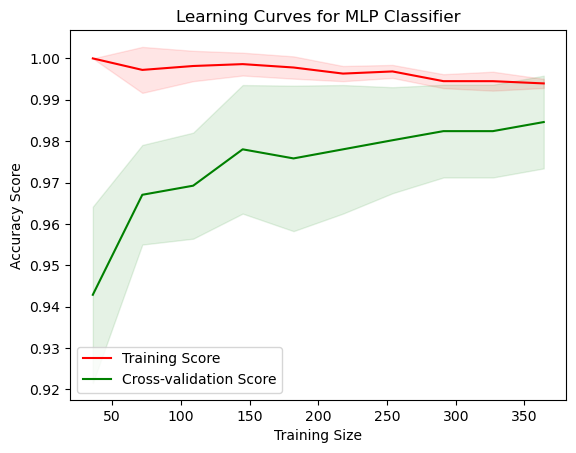

In [113]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# To generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_mlp, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='accuracy')

# To calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Ploting learning curves
plt.figure()
plt.plot(train_sizes, train_mean, label="Training Score", color="r")
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="g")

# Plotting the std deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

# Formatting plot
plt.title("Learning Curves for MLP Classifier")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


#### Learning Curve Results for MLP Classifier

- **Training Score**:
  - The training score starts at a very high value (close to 1.00), indicating that the MLP model fits well to the training data.
  - As the training size increases, the score decreases slightly but remains consistently high, suggesting that the model is not underfitting.

- **Cross-Validation Score**:
  - Initially, the cross-validation score is lower but increases rapidly as the training set grows.
  - The score continues to improve and eventually converges near the training score at around 0.98, indicating the model generalizes well on unseen data.

- **Overfitting Check**:
  - The small gap between the training and cross-validation scores shows that the model is **not overfitting**.
  - Both scores stabilize around a high accuracy level, meaning the model performs well both on the training set and during cross-validation.

### Conclusion:
The learning curves suggest that the MLP model is well-balanced between bias and variance, and additional training or early stopping may not be necessary. The model generalizes effectively, making it ready for further evaluation and interpretation.


### Model Interpretation

Model interpretation is the process of understanding how machine learning models make predictions. It involves analyzing the contributions of different features to the final output of the model. This is especially important in fields like healthcare, finance, and any other domain where decisions based on model predictions can have significant consequences. 

#### Importance of Model Interpretation:

- **Transparency**: 
  - Provides clarity on how decisions are made, allowing stakeholders to understand the rationale behind predictions.
  
- **Accountability**: 
  - Helps ensure that models comply with regulatory requirements and ethical standards, particularly in sensitive applications.

- **Trust**: 
  - Increases user confidence in model outputs by demonstrating that predictions are based on understandable reasoning.

- **Debugging and Improvement**: 
  - Identifies potential biases or weaknesses in the model, allowing for adjustments and improvements to be made.

#### Techniques for Model Interpretation:

1. **Feature Importance**:
   - Measures the contribution of each feature to the model's predictions. Common methods include:
     - Mean Decrease Impurity (MDI) for tree-based models.
     - Permutation feature importance for any model.
  
2. **Partial Dependence Plots (PDP)**:
   - Illustrates the relationship between a feature and the predicted outcome, averaging out the effects of all other features.

3. **Individual Conditional Expectation (ICE) Plots**:
   - Shows how the prediction changes for individual instances as a feature varies, helping to capture interactions between features.

4. **SHAP (SHapley Additive exPlanations)**:
   - A unified measure of feature importance that provides insights into how each feature contributes to the final prediction for each individual instance.

5. **LIME (Local Interpretable Model-agnostic Explanations)**:
   - Explains individual predictions by approximating the model locally with an interpretable model (e.g., linear regression).

#### Application in Machine Learning Projects:

In machine learning projects, especially those involving complex models like deep learning or ensemble methods, model interpretation is crucial. By employing various interpretation techniques, practitioners can:

- Ensure model decisions are explainable to non-technical stakeholders.
- Identify and mitigate biases in model predictions.
- Enhance model performance by refining feature selection and engineering based on insights gained from interpretation.

### Conclusion

Model interpretation is a vital aspect of building responsible AI systems. It provides the necessary insights to make informed decisions based on model outputs, ensuring that models are not only accurate but also trustworthy and transparent.


### SHAP Analysis

**SHAP (SHapley Additive exPlanations)** is a powerful framework for interpreting the output of machine learning models. It provides insights into how each feature contributes to a model's predictions, making it particularly useful in understanding complex models like neural networks, decision trees, and ensembles.

#### Key Concepts:

- **Shapley Values**: 
  - Originating from cooperative game theory, Shapley values attribute a contribution value to each feature by considering the marginal contribution of that feature across all possible combinations of features.

- **Additive Feature Attribution**: 
  - SHAP values are additive, meaning the sum of the SHAP values for all features will equal the difference between the model's output and the expected output. This property allows for intuitive interpretation of the model's predictions.

- **Model-Agnostic**: 
  - SHAP can be applied to any machine learning model, providing a consistent method for feature importance analysis.

#### Applications:

- **Feature Importance**: 
  - Identifies which features are most influential in making predictions.

- **Local Interpretability**: 
  - Explains individual predictions, showing how each feature impacts a specific instance.

- **Global Interpretability**: 
  - Aggregates the information to provide an overview of how features influence the model across the entire dataset.

### Benefits of Using SHAP:

- **Transparency**: 
  - Enhances the understanding of model behavior, crucial for high-stakes domains like healthcare and finance.

- **Debugging**: 
  - Helps identify model weaknesses or biases by revealing how features contribute to predictions.

- **Trust**: 
  - Builds trust in machine learning models by providing clear and interpretable explanations.

### Example Usage:

1. **Install the SHAP library.**
2. **Create a SHAP explainer for the model.**
3. **Calculate SHAP values for the dataset.**
4. **Visualize SHAP values using summary and dependence plots.**



Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

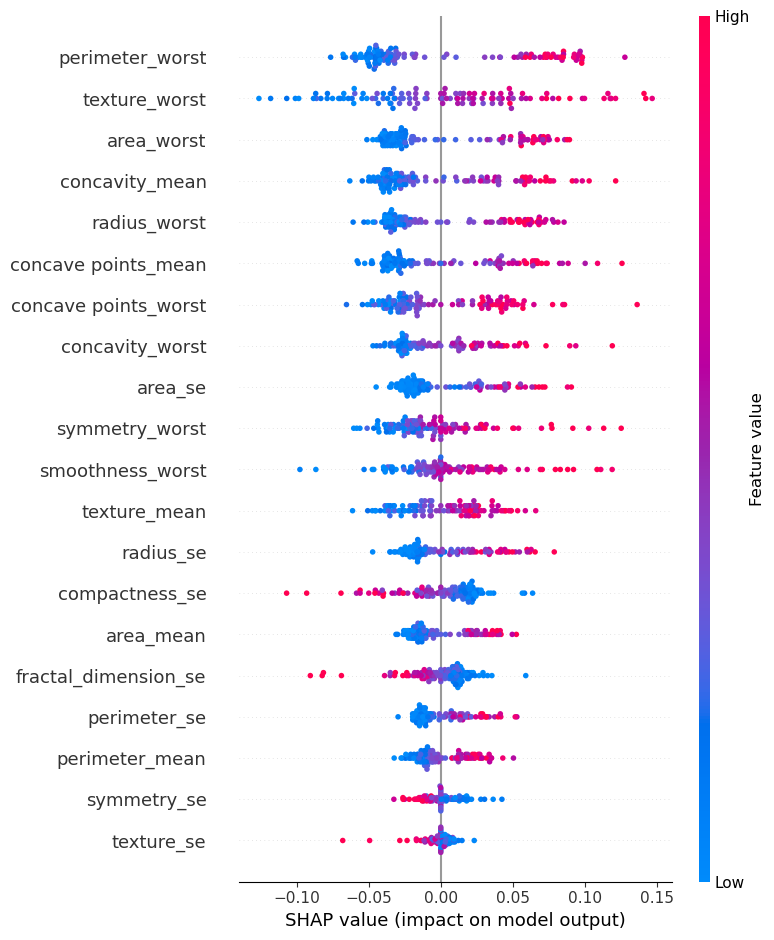

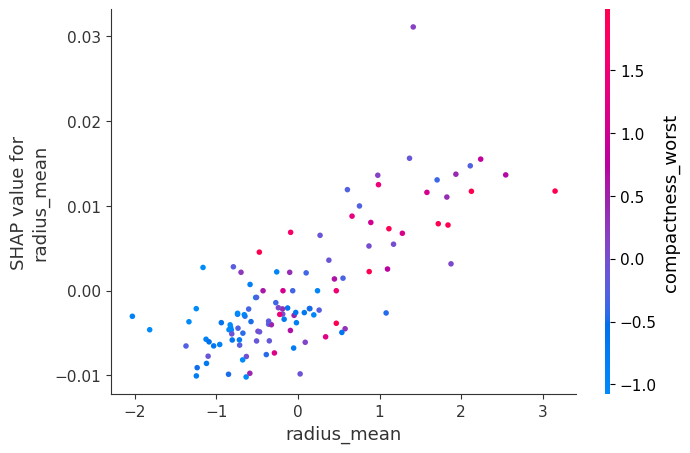

In [124]:
import shap

# Creating a SHAP explainer
explainer = shap.KernelExplainer(best_mlp.predict_proba, X_train)

# Calculating SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Using the SHAP values for the positive class 
shap_values_class_1 = shap_values[1] 

# Summary plot
shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns)

# Dependence plot for a specific feature, e.g., the first feature
shap.dependence_plot(0, shap_values_class_1, X_test, feature_names=X.columns)


#### Interpretation of SHAP Summary Plot

#### Top Features
- Features like **perimeter_worst** and **texture_worst** appear to have significant positive contributions, meaning that higher values of these features are strongly associated with the model predicting a positive outcome (i.e., a diagnosis of cancer).

#### Negative Contributions
- Features like **area_mean** and **compactness_se** have negative SHAP values for many instances, indicating that higher values for these features contribute to lower predictions of cancer.

#### Spread of SHAP Values
- The spread of SHAP values for each feature shows the variability in their impact across different instances. For example, **radius_worst** has a wide range of SHAP values, indicating that its influence varies significantly across different observations.


### Model Deployment

#### Saving Machine Learning Models

Saving a trained machine learning model is essential for deployment, sharing, and future use. Different formats are available for saving models, each with its benefits and use cases.

##### Common Formats for Saving Models

##### 1. **Pickle Format (.pkl)**

- **Description**: Pickle is a Python-specific binary serialization format. It can serialize Python objects, including trained machine learning models.
- **Use Cases**:
  - **Python-Only Environments**: Ideal for projects where the model will be used in a Python environment.
  - **Quick Saving and Loading**: Simple to implement and supports complex Python objects.

##### 2. **Joblib Format (.joblib)**

- **Description**: Joblib is optimized for storing large numpy arrays efficiently. It is often used for saving scikit-learn models.
- **Use Cases**:
  - **Large NumPy Arrays**: Useful when models contain large datasets or arrays.
  - **Performance**: Generally faster than Pickle for loading and saving large models.

##### 3. **HDF5 Format (.h5)**

- **Description**: HDF5 is a file format and set of tools for managing complex data. It is commonly used with deep learning models.
- **Use Cases**:
  - **Large Datasets**: Suitable for models trained on large datasets.
  - **Keras and TensorFlow Models**: Often used for saving models built with Keras or TensorFlow.

##### 4. **ONNX Format (.onnx)**

- **Description**: Open Neural Network Exchange (ONNX) is an open format for representing machine learning models. It allows interoperability between different frameworks.
- **Use Cases**:
  - **Framework Agnostic**: Useful when you want to use the model in different environments (e.g., PyTorch, TensorFlow).
  - **Deployment**: Ideal for deploying models across various platforms and languages.

##### 5. **TensorFlow SavedModel Format**

- **Description**: A format for saving TensorFlow models that includes both the architecture and the weights.
- **Use Cases**:
  - **TensorFlow Serving**: Designed for production use, especially in serving models in a production environment.
  - **Reproducibility**: Facilitates the complete restoration of the model.



In [128]:
import joblib

# Saving the trained model
joblib.dump(best_mlp, 'best_mlp_model.pkl')


['best_mlp_model.pkl']